In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.metrics import classification_report
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Spotify.csv')

In [3]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [4]:
data.shape

(195, 14)

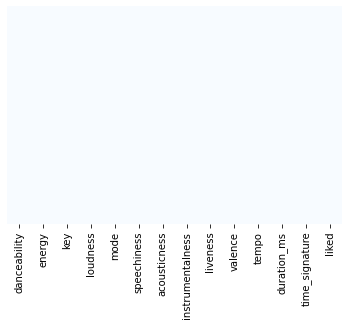

In [5]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues');

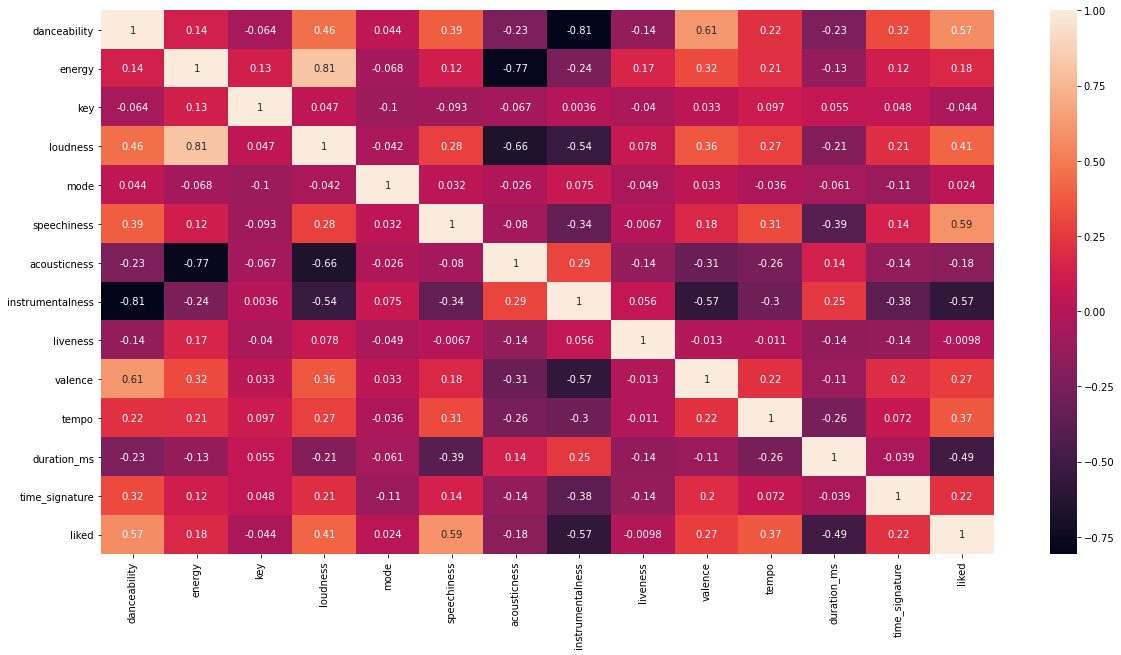

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot = True);

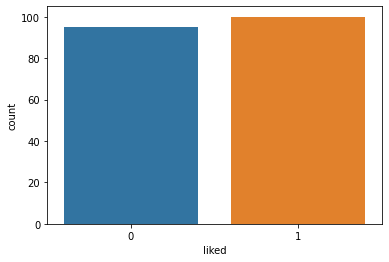

In [7]:
sns.countplot(data['liked']);

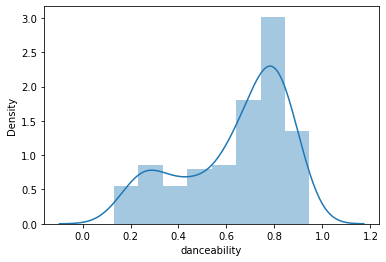

In [8]:
sns.distplot(data['danceability']);

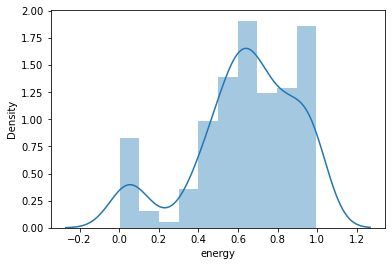

In [9]:
sns.distplot(data['energy']);

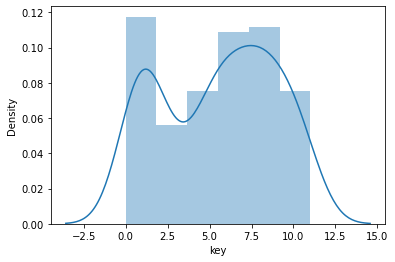

In [10]:
sns.distplot(data['key']);

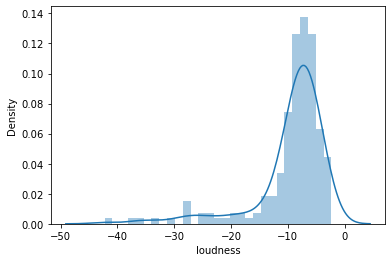

In [11]:
sns.distplot(data['loudness']);

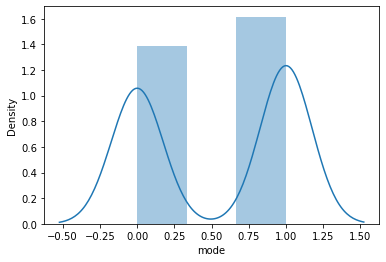

In [12]:
sns.distplot(data['mode']);

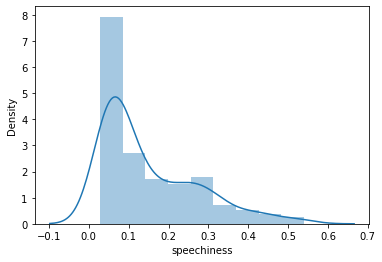

In [13]:
sns.distplot(data['speechiness']);

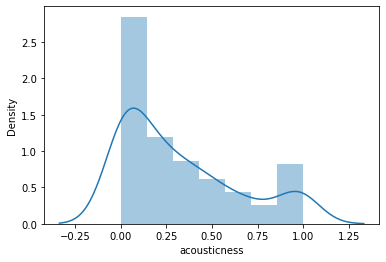

In [14]:
sns.distplot(data['acousticness']);

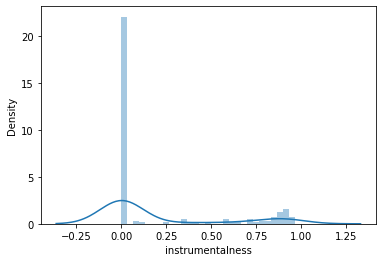

In [15]:
sns.distplot(data['instrumentalness']);

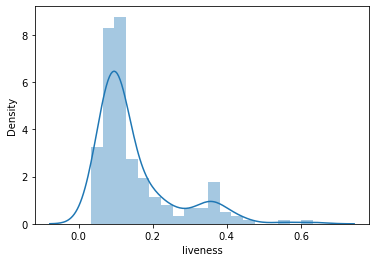

In [16]:
sns.distplot(data['liveness']);

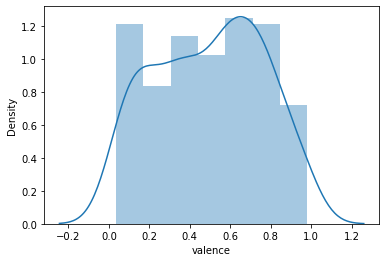

In [17]:
sns.distplot(data['valence']);

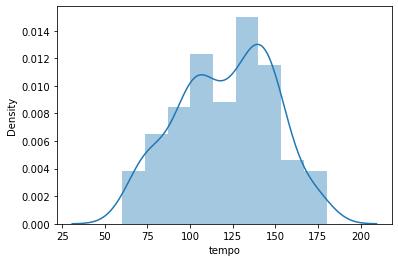

In [18]:
sns.distplot(data['tempo']);

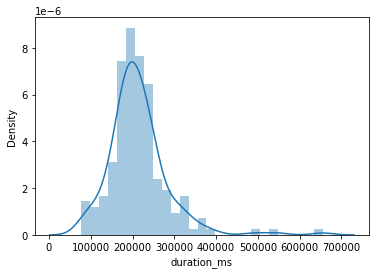

In [19]:
sns.distplot(data['duration_ms']);

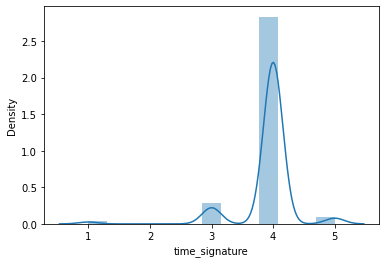

In [20]:
sns.distplot(data['time_signature']);

In [21]:
x = data.drop('liked', axis = 1).values 
y = data[['liked']]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(x_train, y_train)

LogisticRegression()

In [27]:
y_pred = lr.predict(x_test)

In [28]:
def confusion_matrix(actuals,predicted):
    cm = metrics.confusion_matrix(actuals,predicted,[1,0])
    sns.heatmap(cm, annot = True, fmt ='.2f', xticklabels=['Liked', 'Not Liked'], 
                yticklabels=['Liked', 'Not Liked'])
    
    plt.ylabel("Actual Labels")
    plt.xlabel("Predicted Labels")

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.84      0.80      0.82        20

    accuracy                           0.82        39
   macro avg       0.82      0.82      0.82        39
weighted avg       0.82      0.82      0.82        39



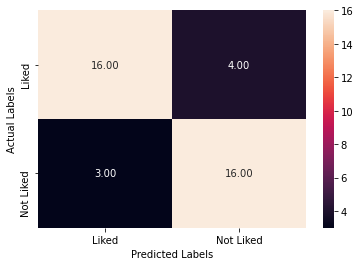

In [30]:
confusion_matrix(y_test, y_pred)

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
# Create first pipeline for base without reducing features.
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [33]:
y_pred2 = clf.predict(x_test)

In [34]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.90      0.90      0.90        20

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



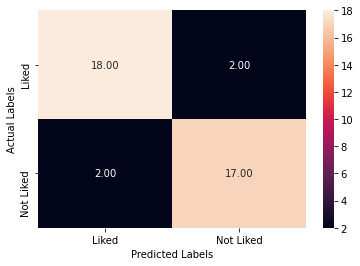

In [35]:
confusion_matrix(y_test, y_pred2)